In [1]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.insert(0, '../')
sys.path.insert(0, '../../')
from nasbench1shot1.nasbench_analysis.search_spaces.search_space_1 import SearchSpace1
from nasbench1shot1.nasbench_analysis.search_spaces.search_space_2 import SearchSpace2
from nasbench1shot1.nasbench_analysis.search_spaces.search_space_3 import SearchSpace3
from nasbench import api
from nasbench1shot1.nasbench_analysis.utils import get_top_k, INPUT, OUTPUT, CONV1X1, NasbenchWrapper, natural_keys

In [2]:
nasbench = NasbenchWrapper(dataset_file='../../data/nasbench_full.tfrecord')

Loading dataset from file... This may take a few minutes...
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Loaded dataset in 181 seconds


In [12]:
search_space_1 = SearchSpace1()

tabular_nasbench = []
for adjacency_matrix, ops, model_spec in search_space_1.generate_search_space_without_loose_ends():
#for iter, adjacency_matrix in enumerate(search_space_1.generate_search_space_with_loose_ends()):
    #print(adjacency_matrix)
    adjacency_matrix = np.array2string(adjacency_matrix[0].flatten())
    data = nasbench.query(model_spec)
    valid_error, test_error, runtime, params = [], [], [], []
    for item in data:
        test_error.append(1 - item['test_accuracy'])
        valid_error.append(1 - item['validation_accuracy'])
        runtime.append(item['training_time'])
        params.append(item['trainable_parameters'])
    ops.extend(valid_error)
    ops.append(np.mean(valid_error))
    ops.append(np.min(valid_error))
    ops.extend(test_error)
    ops.append(np.mean(test_error))
    ops.append(np.min(test_error))
    ops.append(adjacency_matrix)
    tabular_nasbench.append(ops)
    

In [13]:
print(tabular_nasbench[0])
df = pd.DataFrame(tabular_nasbench, columns =['input', 'node1', 'node2','node3', 'node4', 'node5', 'output', 'val1', 'val2','val3', 'mean_val','best_val','test1','test2','test3','mean_test','best_test','adj_matrix'])

['input', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'output', 0.1655648946762085, 0.15945512056350708, 0.16656649112701416, 0.1638621687889099, 0.15945512056350708, 0.16416263580322266, 0.1599559187889099, 0.16436296701431274, 0.1628271738688151, 0.1599559187889099, '[0. 1. 0. 0. 0. 0. 1.]']


In [14]:
df.to_pickle("search_space1.pkl")
df.describe()

,val1,val2,val3,mean_val,best_val,test1,test2,test3,mean_test,best_test
count,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000
mean,0.089374,0.090159,0.089136,0.089556,0.081957,0.094981,0.095633,0.094636,0.095083,0.087549
std,0.066913,0.069125,0.064447,0.050274,0.024891,0.065922,0.068191,0.063495,0.049521,0.024308
min,0.050481,0.050581,0.049780,0.052818,0.049780,0.056390,0.054487,0.056190,0.057993,0.054487
25%,0.066006,0.066406,0.065755,0.066072,0.064002,0.071915,0.071815,0.071214,0.071548,0.069111
50%,0.078626,0.078926,0.078626,0.079227,0.075821,0.084836,0.085036,0.085437,0.085303,0.082532
75%,0.097005,0.097857,0.097356,0.097222,0.093399,0.102764,0.103516,0.103516,0.102815,0.099359
max,0.904948,0.904948,0.905549,0.661792,0.259716,0.899940,0.899940,0.900140,0.658420,0.268930


In [15]:
search_space_2 = SearchSpace2()

tabular_nasbench = []
for adjacency_matrix, ops, model_spec in search_space_2.generate_search_space_without_loose_ends():
    adjacency_matrix = np.array2string(adjacency_matrix.flatten())
    data = nasbench.query(model_spec)
    valid_error, test_error, runtime, params = [], [], [], []
    for item in data:
        test_error.append(1 - item['test_accuracy'])
        valid_error.append(1 - item['validation_accuracy'])
        runtime.append(item['training_time'])
        params.append(item['trainable_parameters'])
    ops.extend(valid_error)
    ops.append(np.mean(valid_error))
    ops.append(np.min(valid_error))
    ops.extend(test_error)
    ops.append(np.mean(test_error))
    ops.append(np.min(test_error))
    ops.append(adjacency_matrix)
    tabular_nasbench.append(ops) 
print(tabular_nasbench[0])
df = pd.DataFrame(tabular_nasbench, columns =['input', 'node1', 'node2','node3', 'node4', 'node5', 'output', 'val1', 'val2','val3', 'mean_val','best_val','test1','test2','test3','mean_test','best_test','adj_matrix'])
df.to_pickle("search_space2.pkl")
df.describe()

['input', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'output', 0.164963960647583, 0.1614583134651184, 0.16616588830947876, 0.16419605414072672, 0.1614583134651184, 0.16506409645080566, 0.16526442766189575, 0.16336137056350708, 0.16456329822540283, 0.16336137056350708, '[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0.]']


,val1,val2,val3,mean_val,best_val,test1,test2,test3,mean_test,best_test
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,0.094783,0.095845,0.094992,0.095207,0.087212,0.100490,0.101584,0.100708,0.100927,0.093014
std,0.074771,0.079459,0.074839,0.063640,0.044008,0.073683,0.078257,0.073734,0.062684,0.043213
min,0.053786,0.051583,0.053085,0.054821,0.051583,0.057792,0.059395,0.058794,0.060931,0.057792
25%,0.070413,0.070413,0.070613,0.070780,0.067608,0.076723,0.076823,0.076823,0.076990,0.074018
50%,0.082031,0.082632,0.082232,0.082332,0.079026,0.088341,0.088942,0.088542,0.088575,0.085136
75%,0.102464,0.102564,0.102364,0.102464,0.098558,0.107772,0.107873,0.107873,0.108173,0.103866
max,0.905148,0.904948,0.905048,0.904948,0.904948,0.900441,0.899940,0.900040,0.899940,0.899940


In [16]:
search_space_3 = SearchSpace3()

tabular_nasbench = []
for adjacency_matrix, ops, model_spec in search_space_3.generate_search_space_without_loose_ends():
    adjacency_matrix = np.array2string(adjacency_matrix.flatten())
    data = nasbench.query(model_spec)
    valid_error, test_error, runtime, params = [], [], [], []
    for item in data:
        test_error.append(1 - item['test_accuracy'])
        valid_error.append(1 - item['validation_accuracy'])
        runtime.append(item['training_time'])
        params.append(item['trainable_parameters'])
    ops.extend(valid_error)
    ops.append(np.mean(valid_error))
    ops.append(np.min(valid_error))
    ops.extend(test_error)
    ops.append(np.mean(test_error))
    ops.append(np.min(test_error))
    ops.append(adjacency_matrix)
    tabular_nasbench.append(ops) 
print(tabular_nasbench[0])
df = pd.DataFrame(tabular_nasbench, columns =['input', 'node1', 'node2','node3', 'node4', 'node5', 'output', 'val1', 'val2','val3', 'mean_val','best_val','test1','test2','test3','mean_test','best_test','adj_matrix'])
df.to_pickle("search_space3.pkl")
df.describe()

['input', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'output', 0.1655648946762085, 0.15945512056350708, 0.16656649112701416, 0.1638621687889099, 0.15945512056350708, 0.16416263580322266, 0.1599559187889099, 0.16436296701431274, 0.1628271738688151, 0.1599559187889099, '[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0.]']


,val1,val2,val3,mean_val,best_val,test1,test2,test3,mean_test,best_test
count,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000
mean,0.101444,0.101974,0.102594,0.102004,0.092163,0.107004,0.107544,0.108198,0.107582,0.097790
std,0.086801,0.088814,0.091723,0.074211,0.051833,0.085724,0.087688,0.090570,0.073342,0.051197
min,0.050581,0.050080,0.051082,0.052618,0.050080,0.056190,0.056090,0.055990,0.058226,0.055990
25%,0.073217,0.073217,0.073217,0.073317,0.070513,0.078851,0.078826,0.078826,0.079026,0.076222
50%,0.087941,0.088341,0.088241,0.088475,0.084836,0.093850,0.094351,0.094050,0.094384,0.090745
75%,0.107272,0.107272,0.107272,0.107338,0.102865,0.112780,0.112881,0.112981,0.112981,0.108674
max,0.905148,0.905148,0.905248,0.905048,0.904948,0.900040,0.900040,0.900240,0.900040,0.899940


In [52]:
import pickle
PRIMITIVES = [
    'maxpool3x3',
    'conv3x3-bn-relu',
    'conv1x1-bn-relu'
]
search_space_1_pd = pd.read_pickle("search_space1.pkl")
search_space_1_pd.describe()

,val1,val2,val3,mean_val,best_val,test1,test2,test3,mean_test,best_test
count,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000
mean,0.089374,0.090159,0.089136,0.089556,0.081957,0.094981,0.095633,0.094636,0.095083,0.087549
std,0.066913,0.069125,0.064447,0.050274,0.024891,0.065922,0.068191,0.063495,0.049521,0.024308
min,0.050481,0.050581,0.049780,0.052818,0.049780,0.056390,0.054487,0.056190,0.057993,0.054487
25%,0.066006,0.066406,0.065755,0.066072,0.064002,0.071915,0.071815,0.071214,0.071548,0.069111
50%,0.078626,0.078926,0.078626,0.079227,0.075821,0.084836,0.085036,0.085437,0.085303,0.082532
75%,0.097005,0.097857,0.097356,0.097222,0.093399,0.102764,0.103516,0.103516,0.102815,0.099359
max,0.904948,0.904948,0.905549,0.661792,0.259716,0.899940,0.899940,0.900140,0.658420,0.268930


In [53]:
op_strength = [
{'zc-pt':[-1561.2969, -1545.901, -1547.141], 'disc-zc':[1537.1261, 1560.6963, 1557.6202]},
{'zc-pt':[-1563.5586, -1545.6113, -1547.6064], 'disc-zc':[1533.1307, 1562.5522, 1557.1984]},
{'zc-pt':[-1551.4971, -1544.5808, -1544.4414], 'disc-zc':[1532.6304, 1549.446, 1550.0469]},
{'zc-pt':[-1548.7837, -1543.9828, -1543.8558], 'disc-zc':[1537.1195, 1547.1031, 1547.7458]},
]

# op_strength = [
# {'zc-pt':[-1561.4567, -1546.0673, -1547.1295]},
# {'zc-pt':[-1562.0037, -1544.4679, -1546.4885]},
# {'zc-pt':[-1551.3938, -1544.5706, -1544.3312]},
# {'zc-pt':[-1548.894, -1544.1014, -1543.91]},
# ]

mean_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_1_pd[search_space_1_pd[n] == op]['mean_test'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_test'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_1_pd[search_space_1_pd[n] == op]['best_test'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_test'] = max_acc[index]
    index+=1
    
mean_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_1_pd[search_space_1_pd[n] == op]['mean_val'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_val'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_1_pd[search_space_1_pd[n] == op]['best_val'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_val'] = max_acc[index]
    index+=1

model_list = pickle.load(open('../../experiments/darts/search_space_1/search-baseline-20211117-081908-0-1/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]


index = 0
for row in op_strength:
    row['darts'] = alphas_mixed_op[index]
    index+=1

model_list = pickle.load(open('../../experiments/gdas/search_space_1/search-baseline-20211118-073146-0-0.025-1/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]

index = 0
for row in op_strength:
    row['gdas'] = alphas_mixed_op[index]
    index+=1
print(op_strength)

index=0
best_zc = [[1957.577866864596, 1957.6342043953766, 1936.137360378737], [1957.6342043953766, 1957.577866864596, 1938.3248621308128], [1957.577866864596, 1957.6342043953766, 1935.2843817695896], [1957.146365482576, 1957.6342043953766, 1930.7339235371005]]
for row in op_strength:
    row['best_zc'] = best_zc[index]
    index+=1

[{'zc-pt': [-1561.2969, -1545.901, -1547.141], 'disc-zc': [1537.1261, 1560.6963, 1557.6202], 'avg_test': [0.9011424712755856, 0.9149180704665606, 0.8986900556498519], 'best_test': [0.9438101053237915, 0.9455128312110901, 0.942307710647583], 'avg_val': [0.9067561177631962, 0.9205398117029192, 0.9040353591746723], 'best_val': [0.9502203464508057, 0.9494190812110901, 0.9479166865348816], 'darts': array([-0.15533198,  0.42218527, -0.3585119 ], dtype=float32), 'gdas': array([-0.60156214,  0.7249965 , -0.21059866], dtype=float32)}, {'zc-pt': [-1563.5586, -1545.6113, -1547.6064], 'disc-zc': [1533.1307, 1562.5522, 1557.1984], 'avg_test': [0.8919220879504478, 0.9184344118413754, 0.9045032112114195], 'best_test': [0.9437099099159241, 0.9455128312110901, 0.9439102411270142], 'avg_val': [0.8973344668569997, 0.9242123795423921, 0.9099220574526236], 'best_val': [0.9486178159713745, 0.9502203464508057, 0.9485176205635071], 'darts': array([-0.28444162,  0.47620338, -0.235576  ], dtype=float32), 'gdas'

In [54]:
all_corr = []
for row in op_strength:
    df = pd.DataFrame(row)
    all_corr.append(df.corr(method='spearman'))
df      = pd.concat(all_corr)
df_mean = df.groupby(level=0).mean()
df_mean

,zc-pt,disc-zc,avg_test,best_test,avg_val,best_val,darts,gdas,best_zc
avg_test,0.625,0.625,1.000,0.875,1.000,0.625,0.625,0.875,0.375
avg_val,0.625,0.625,1.000,0.875,1.000,0.625,0.625,0.875,0.375
best_test,0.750,0.750,0.875,1.000,0.875,0.750,0.500,0.750,0.125
best_val,0.375,0.375,0.625,0.750,0.625,1.000,0.250,0.375,0.250
best_zc,-0.250,-0.250,0.375,0.125,0.375,0.250,0.000,0.250,1.000
darts,0.625,0.625,0.625,0.500,0.625,0.250,1.000,0.500,0.000
disc-zc,1.000,1.000,0.625,0.750,0.625,0.375,0.625,0.750,-0.250
gdas,0.750,0.750,0.875,0.750,0.875,0.375,0.500,1.000,0.250
zc-pt,1.000,1.000,0.625,0.750,0.625,0.375,0.625,0.750,-0.250


           best_test  avg_test  best_val  avg_val  darts  zc-pt  disc-zc
best_test      1.000     0.875     0.750    0.875  0.500  0.750    0.750
avg_test       0.875     1.000     0.625    1.000  0.625  0.625    0.625
best_val       0.750     0.625     1.000    0.625  0.250  0.375    0.375
avg_val        0.875     1.000     0.625    1.000  0.625  0.625    0.625
darts          0.500     0.625     0.250    0.625  1.000  0.625    0.625
zc-pt          0.750     0.625     0.375    0.625  0.625  1.000    1.000
disc-zc        0.750     0.625     0.375    0.625  0.625  1.000    1.000
(4, 6)
(4, 6)


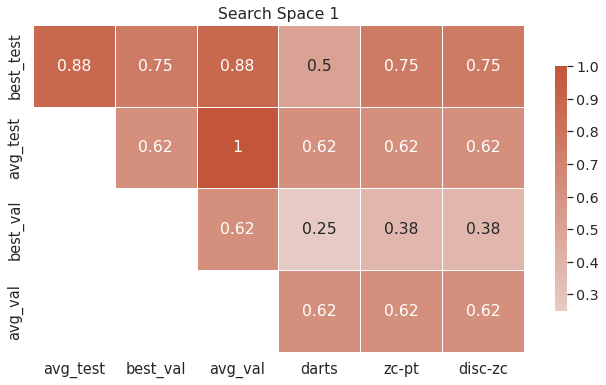

In [56]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pathlib

sns.set_theme(style="white")

#if 'zc' in flat_op_strengths:
#    flat_op_strengths.pop('zc')
df = df_mean
df=df.reindex(["best_test", "avg_test", 'best_val', 'avg_val', "darts" ,"zc-pt", 'disc-zc'])
df = df[["best_test", "avg_test", 'best_val', 'avg_val', "darts","zc-pt", 'disc-zc']]
#print(df)

# Compute the correlation matrix
#corr = df.corr(method='spearman')
corr=df
print(corr)

# Generate a mask for the upper triangle
mask = np.tril(np.ones_like(corr, dtype=bool))
for i in range(4,7):
    for j in range(0,7):
        mask[i][j]=True

masked_corr = corr.loc[~np.all(mask, axis=1), ~np.all(mask, axis=0)]
masked_mask = mask[0:4,1:7]
print(np.shape(masked_corr))
print(np.shape(masked_mask))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
sns.set(font_scale=1.3)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(masked_corr, mask=masked_mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

g.set_yticklabels(labels=g.get_yticklabels(), va='center', fontsize = 14.5)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 14.5)
plt.title('Search Space 1')
f.savefig(pathlib.Path('metric_correlation_space_1').with_suffix('.pdf'), bbox_inches='tight')

In [57]:
op_strength = [
{'zc-pt':[-1571.082, -1556.7533, -1557.5646],'disc-zc':[1545.5188, 1571.2905, 1568.2137]},
{'zc-pt':[-1563.9012, -1553.9757, -1554.926],'disc-zc':[1544.4409, 1565.4459, 1562.43]},
{'zc-pt':[-1561.0864, -1554.7698, -1554.3923],'disc-zc':[1543.3566, 1560.096, 1561.0798]},
{'zc-pt':[-1558.1128, -1553.9596, -1553.8993],'disc-zc':[1549.1406, 1557.9966, 1558.5977]},
]

search_space_2_pd = pd.read_pickle("search_space2.pkl")
search_space_2_pd.describe()

,val1,val2,val3,mean_val,best_val,test1,test2,test3,mean_test,best_test
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,0.094783,0.095845,0.094992,0.095207,0.087212,0.100490,0.101584,0.100708,0.100927,0.093014
std,0.074771,0.079459,0.074839,0.063640,0.044008,0.073683,0.078257,0.073734,0.062684,0.043213
min,0.053786,0.051583,0.053085,0.054821,0.051583,0.057792,0.059395,0.058794,0.060931,0.057792
25%,0.070413,0.070413,0.070613,0.070780,0.067608,0.076723,0.076823,0.076823,0.076990,0.074018
50%,0.082031,0.082632,0.082232,0.082332,0.079026,0.088341,0.088942,0.088542,0.088575,0.085136
75%,0.102464,0.102564,0.102364,0.102464,0.098558,0.107772,0.107873,0.107873,0.108173,0.103866
max,0.905148,0.904948,0.905048,0.904948,0.904948,0.900441,0.899940,0.900040,0.899940,0.899940


In [58]:
mean_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_2_pd[search_space_2_pd[n] == op]['mean_test'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_test'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_2_pd[search_space_2_pd[n] == op]['best_test'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_test'] = max_acc[index]
    index+=1
    
mean_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_2_pd[search_space_2_pd[n] == op]['mean_val'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_val'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_2_pd[search_space_2_pd[n] == op]['best_val'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_val'] = max_acc[index]
    index+=1

model_list = pickle.load(open('../../experiments/darts/search_space_2/search-baseline-20211117-102058-0-2/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]
print(alphas_mixed_op)

index = 0
for row in op_strength:
    row['darts'] = alphas_mixed_op[index]
    index+=1
    
model_list = pickle.load(open('../../experiments/gdas/search_space_2/search-baseline-20211118-073322-0-0.025-2/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]

index = 0
for row in op_strength:
    row['gdas'] = alphas_mixed_op[index]
    index+=1
    
best_zc = [[1885.3651803861871, 1885.4258926702205, 1865.6187849878424], [1885.371179699335, 1885.4258926702205, 1867.211469063152], [1885.4258926702205, 1885.320541569764, 1864.8086583289898], [1885.371179699335, 1885.4258926702205, 1863.4337113652825]]
index = 0
for row in op_strength:
    row['best_zc'] = best_zc[index]
    index+=1

[[-0.06837409  0.28621525 -0.2840708 ]
 [-0.11984652  0.2508348  -0.17850986]
 [-0.21762423  0.20400664 -0.0487219 ]
 [ 0.11392259 -0.00911051 -0.06399859]]


In [60]:
all_corr = []
for row in op_strength:
    df = pd.DataFrame(row)
    all_corr.append(df.corr(method='spearman'))
df      = pd.concat(all_corr)
df_mean = df.groupby(level=0).mean()
df_mean

,zc-pt,disc-zc,avg_test,best_test,avg_val,best_val,darts,gdas,best_zc
avg_test,0.625,0.625,1.000,0.875,1.000,0.750,0.500,0.875,0.375
avg_val,0.625,0.625,1.000,0.875,1.000,0.750,0.500,0.875,0.375
best_test,0.375,0.375,0.875,1.000,0.875,0.500,0.375,0.625,0.250
best_val,0.625,0.625,0.750,0.500,0.750,1.000,0.125,0.875,0.000
best_zc,-0.125,-0.125,0.375,0.250,0.375,0.000,0.500,0.250,1.000
darts,0.125,0.125,0.500,0.375,0.500,0.125,1.000,0.375,0.500
disc-zc,1.000,1.000,0.625,0.375,0.625,0.625,0.125,0.750,-0.125
gdas,0.750,0.750,0.875,0.625,0.875,0.875,0.375,1.000,0.250
zc-pt,1.000,1.000,0.625,0.375,0.625,0.625,0.125,0.750,-0.125


           best_test  avg_test  best_val  avg_val  darts  zc-pt  disc-zc
best_test      1.000     0.875     0.500    0.875  0.375  0.375    0.375
avg_test       0.875     1.000     0.750    1.000  0.500  0.625    0.625
best_val       0.500     0.750     1.000    0.750  0.125  0.625    0.625
avg_val        0.875     1.000     0.750    1.000  0.500  0.625    0.625
darts          0.375     0.500     0.125    0.500  1.000  0.125    0.125
zc-pt          0.375     0.625     0.625    0.625  0.125  1.000    1.000
disc-zc        0.375     0.625     0.625    0.625  0.125  1.000    1.000
(4, 6)
(4, 6)


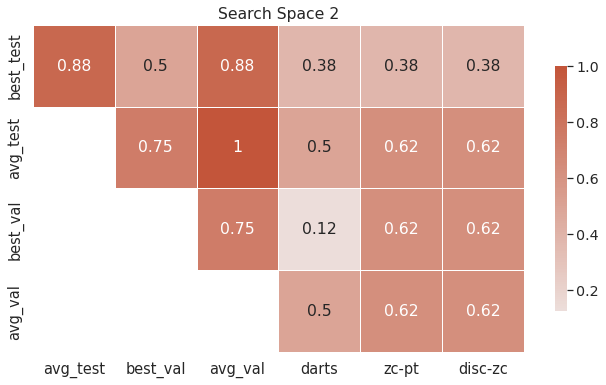

In [61]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pathlib

sns.set_theme(style="white")

#if 'zc' in flat_op_strengths:
#    flat_op_strengths.pop('zc')
df = df_mean
df=df.reindex(["best_test", "avg_test", 'best_val', 'avg_val', "darts" ,"zc-pt", 'disc-zc'])
df = df[["best_test", "avg_test", 'best_val', 'avg_val', "darts" ,"zc-pt", 'disc-zc']]
#print(df)

# Compute the correlation matrix
#corr = df.corr(method='spearman')
corr=df
print(corr)

# Generate a mask for the upper triangle
mask = np.tril(np.ones_like(corr, dtype=bool))

for i in range(4,7):
    for j in range(0,7):
        mask[i][j]=True

masked_corr = corr.loc[~np.all(mask, axis=1), ~np.all(mask, axis=0)]
masked_mask = mask[0:4,1:7]
print(np.shape(masked_corr))
print(np.shape(masked_mask))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
sns.set(font_scale=1.3)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(masked_corr, mask=masked_mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

g.set_yticklabels(labels=g.get_yticklabels(), va='center', fontsize = 14.5)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 14.5)
plt.title('Search Space 2')
f.savefig(pathlib.Path('metric_correlation_space_2').with_suffix('.pdf'), bbox_inches='tight')

In [67]:
op_strength = [
{'zc-pt':[-1607.2521, -1592.4702, -1592.8423],'disc-zc':[1572.9888, 1605.9922, 1603.3281]},
{'zc-pt':[-1594.7885, -1587.9753, -1588.3701],'disc-zc':[1578.7544, 1596.7059, 1595.4058]},
{'zc-pt':[-1595.8427, -1590.0057, -1589.7545],'disc-zc':[1579.9984, 1594.7714, 1595.4946]},
{'zc-pt':[-1592.5262, -1590.3983, -1590.2769],'disc-zc':[1585.6464, 1591.4767, 1591.5876]},
{'zc-pt':[-1591.4397, -1589.012, -1589.29],'disc-zc':[1584.9794, 1592.0288, 1591.0554]},
]

search_space_3_pd = pd.read_pickle("search_space3.pkl")

search_space_3_pd.describe()

,val1,val2,val3,mean_val,best_val,test1,test2,test3,mean_test,best_test
count,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000,24066.000000
mean,0.101444,0.101974,0.102594,0.102004,0.092163,0.107004,0.107544,0.108198,0.107582,0.097790
std,0.086801,0.088814,0.091723,0.074211,0.051833,0.085724,0.087688,0.090570,0.073342,0.051197
min,0.050581,0.050080,0.051082,0.052618,0.050080,0.056190,0.056090,0.055990,0.058226,0.055990
25%,0.073217,0.073217,0.073217,0.073317,0.070513,0.078851,0.078826,0.078826,0.079026,0.076222
50%,0.087941,0.088341,0.088241,0.088475,0.084836,0.093850,0.094351,0.094050,0.094384,0.090745
75%,0.107272,0.107272,0.107272,0.107338,0.102865,0.112780,0.112881,0.112981,0.112981,0.108674
max,0.905148,0.905148,0.905248,0.905048,0.904948,0.900040,0.900040,0.900240,0.900040,0.899940


In [68]:
mean_acc = []
for n in ['node1', 'node2','node3', 'node4', 'node5']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_3_pd[search_space_3_pd[n] == op]['mean_test'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_test'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4', 'node5']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_3_pd[search_space_3_pd[n] == op]['best_test'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_test'] = max_acc[index]
    index+=1
    
mean_acc = []
for n in ['node1', 'node2','node3', 'node4', 'node5']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_3_pd[search_space_3_pd[n] == op]['mean_val'].mean())
    mean_acc.append(acc_list)
    
index = 0
for row in op_strength:
    row['avg_val'] = mean_acc[index]
    index+=1

max_acc = []
for n in ['node1', 'node2','node3', 'node4', 'node5']:
    acc_list = []
    for op in PRIMITIVES:
        acc_list.append(1-search_space_3_pd[search_space_3_pd[n] == op]['best_val'].min())
    max_acc.append(acc_list)

index = 0
for row in op_strength:
    row['best_val'] = max_acc[index]
    index+=1

model_list = pickle.load(open('../../experiments/darts/search_space_3/search-baseline-20211117-102128-0-3/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]
print(alphas_mixed_op)

index = 0
for row in op_strength:
    row['darts'] = alphas_mixed_op[index]
    index+=1
    
model_list = pickle.load(open('../../experiments/gdas/search_space_3/search-baseline-20211118-073355-0-0.025-3/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]
print(alphas_mixed_op)

index = 0
for row in op_strength:
    row['gdas'] = alphas_mixed_op[index]
    index+=1

[[-0.10527673  0.3837883  -0.33968076]
 [-0.27247307  0.45539308 -0.3143204 ]
 [-0.21664971  0.18517315 -0.02566187]
 [-0.2824677   0.14025387  0.06650879]
 [-0.12130244 -0.01854234  0.13866161]]
[[-0.6634956   0.8018449  -0.2480915 ]
 [-0.46219984  0.63503075 -0.21257482]
 [-0.30897266  0.4294812  -0.13782288]
 [-0.27533886  0.32593504 -0.0457304 ]
 [-0.25443754  0.29968253 -0.03940192]]


In [69]:
all_corr = []
for row in op_strength:
    df = pd.DataFrame(row)
    all_corr.append(df.corr(method='spearman'))
df      = pd.concat(all_corr)
df_mean = df.groupby(level=0).mean()
df_mean

,zc-pt,disc-zc,avg_test,best_test,avg_val,best_val,darts,gdas
avg_test,0.700,0.700,1.0,0.700,1.0,0.500,0.800,0.9
avg_val,0.700,0.700,1.0,0.700,1.0,0.500,0.800,0.9
best_test,0.600,0.600,0.7,1.000,0.7,0.375,0.600,0.8
best_val,0.375,0.375,0.5,0.375,0.5,1.000,0.375,0.5
darts,0.500,0.500,0.8,0.600,0.8,0.375,1.000,0.7
disc-zc,1.000,1.000,0.7,0.600,0.7,0.375,0.500,0.8
gdas,0.800,0.800,0.9,0.800,0.9,0.500,0.700,1.0
zc-pt,1.000,1.000,0.7,0.600,0.7,0.375,0.500,0.8


           best_test  avg_test  best_val  avg_val  darts  zc-pt  disc-zc
best_test      1.000       0.7     0.375      0.7  0.600  0.600    0.600
avg_test       0.700       1.0     0.500      1.0  0.800  0.700    0.700
best_val       0.375       0.5     1.000      0.5  0.375  0.375    0.375
avg_val        0.700       1.0     0.500      1.0  0.800  0.700    0.700
darts          0.600       0.8     0.375      0.8  1.000  0.500    0.500
zc-pt          0.600       0.7     0.375      0.7  0.500  1.000    1.000
disc-zc        0.600       0.7     0.375      0.7  0.500  1.000    1.000
(4, 6)
(4, 6)


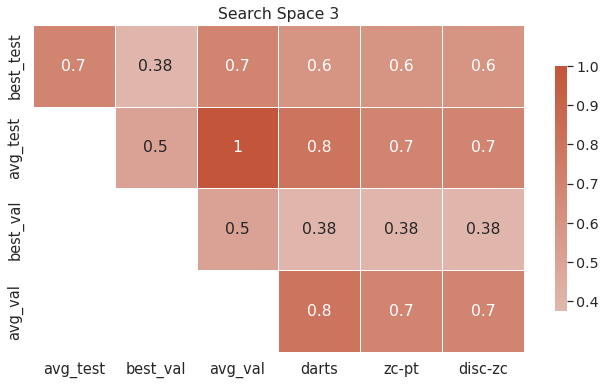

In [71]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pathlib

sns.set_theme(style="white")

#if 'zc' in flat_op_strengths:
#    flat_op_strengths.pop('zc')
df = df_mean
df=df.reindex(["best_test", "avg_test", 'best_val', 'avg_val', "darts","zc-pt",'disc-zc'])
df = df[["best_test", "avg_test", 'best_val', 'avg_val', "darts","zc-pt",'disc-zc']]
#print(df)

# Compute the correlation matrix
#corr = df.corr(method='spearman')
corr=df
print(corr)

# Generate a mask for the upper triangle
mask = np.tril(np.ones_like(corr, dtype=bool))

for i in range(4,7):
    for j in range(0,7):
        mask[i][j]=True

masked_corr = corr.loc[~np.all(mask, axis=1), ~np.all(mask, axis=0)]
masked_mask = mask[0:4,1:7]
print(np.shape(masked_corr))
print(np.shape(masked_mask))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
sns.set(font_scale=1.3)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(masked_corr, mask=masked_mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

g.set_yticklabels(labels=g.get_yticklabels(), va='center', fontsize = 14.5)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 14.5)
plt.title('Search Space 3')
f.savefig(pathlib.Path('metric_correlation_space_3').with_suffix('.pdf'), bbox_inches='tight')

In [29]:
import torch
import torch.nn.functional as F
def softmax(weights, axis=-1):
    return F.softmax(torch.Tensor(weights), axis).data.cpu().numpy()


In [30]:
#model_list = pickle.load(open('../../experiments/darts/search_space_1/search-baseline-20211117-081908-0-1/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_1/search-baseline-20211117-134944-1-1/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_1/search-baseline-20211117-175230-2-1/one_shot_architecture_49.obj', 'rb'))
model_list = pickle.load(open('../../experiments/darts/search_space_1/search-baseline-20211117-180802-3-1/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]
chosen_node_ops = softmax(alphas_mixed_op, axis=-1).argmax(-1)

node_list = [PRIMITIVES[i] for i in chosen_node_ops]
alphas_output = model_list[1]
alphas_inputs = model_list[2:]


search_space = SearchSpace1()
num_inputs = list(search_space.num_parents_per_node.values())[3:-1]
parents_node_3, parents_node_4 = \
    [get_top_k(softmax(alpha, axis=1), num_input) for num_input, alpha in zip(num_inputs, alphas_inputs)]
output_parents = get_top_k(softmax(alphas_output), num_inputs[-1])
parents = {
    '0': [],
    '1': [0],
    '2': [0, 1],
    '3': parents_node_3,
    '4': parents_node_4,
    '5': output_parents
}
node_list = [INPUT, *node_list, CONV1X1, OUTPUT]

adjacency_matrix = search_space.create_nasbench_adjacency_matrix(parents)
# Convert the adjacency matrix in format for nasbench
adjacency_list = adjacency_matrix.astype(np.int).tolist()
model_spec = api.ModelSpec(matrix=adjacency_list, ops=node_list)
# Query nasbench
data = nasbench.query(model_spec)
valid_error, test_error, runtime, params = [], [], [], []
for item in data:
    test_error.append(1 - item['test_accuracy'])
    valid_error.append(1 - item['validation_accuracy'])
    runtime.append(item['training_time'])
    params.append(item['trainable_parameters'])

print(valid_error, test_error)

[0.06189906597137451, 0.06159853935241699, 0.058994412422180176] [0.0675080418586731, 0.06700718402862549, 0.06650638580322266]


In [ ]:
model_list = pickle.load(open('../../experiments/darts/search_space_2/search-baseline-20211117-102058-0-2/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_2/search-baseline-20211117-135119-1-2/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_2/search-baseline-20211117-154648-2-2/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_2/search-baseline-20211117-175205-3-2/one_shot_architecture_49.obj', 'rb'))


alphas_mixed_op = model_list[0]
chosen_node_ops = softmax(alphas_mixed_op, axis=-1).argmax(-1)

node_list = [PRIMITIVES[i] for i in chosen_node_ops]
alphas_output = model_list[1]
alphas_inputs = model_list[2:]


search_space = SearchSpace2()
num_inputs = list(search_space.num_parents_per_node.values())[2:]
parents_node_2, parents_node_3, parents_node_4 = \
    [get_top_k(softmax(alpha, axis=1), num_input) for num_input, alpha in zip(num_inputs[:-1], alphas_inputs)]
output_parents = get_top_k(softmax(alphas_output), num_inputs[-1])
parents = {
    '0': [],
    '1': [0],
    '2': parents_node_2,
    '3': parents_node_3,
    '4': parents_node_4,
    '5': output_parents
}
node_list = [INPUT, *node_list, CONV1X1, OUTPUT]

adjacency_matrix = search_space.create_nasbench_adjacency_matrix(parents)
# Convert the adjacency matrix in format for nasbench
adjacency_list = adjacency_matrix.astype(np.int).tolist()
model_spec = api.ModelSpec(matrix=adjacency_list, ops=node_list)
# Query nasbench
data = nasbench.query(model_spec)
valid_error, test_error, runtime, params = [], [], [], []
for item in data:
    test_error.append(1 - item['test_accuracy'])
    valid_error.append(1 - item['validation_accuracy'])
    runtime.append(item['training_time'])
    params.append(item['trainable_parameters'])

print(valid_error, test_error)

In [ ]:
#model_list = pickle.load(open('../../experiments/darts/search_space_3/search-baseline-20211117-102128-0-3/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_3/search-baseline-20211117-135040-1-3/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_3/search-baseline-20211117-155246-2-3/one_shot_architecture_49.obj', 'rb'))
model_list = pickle.load(open('../../experiments/darts/search_space_3/search-baseline-20211117-175314-3-3/one_shot_architecture_49.obj', 'rb'))

alphas_mixed_op = model_list[0]
chosen_node_ops = softmax(alphas_mixed_op, axis=-1).argmax(-1)

node_list = [PRIMITIVES[i] for i in chosen_node_ops]
alphas_output = model_list[1]
alphas_inputs = model_list[2:]


search_space = SearchSpace3()
num_inputs = list(search_space.num_parents_per_node.values())[2:]
parents_node_2, parents_node_3, parents_node_4, parents_node_5 = \
    [get_top_k(softmax(alpha, axis=1), num_input) for num_input, alpha in zip(num_inputs[:-1], alphas_inputs)]
output_parents = get_top_k(softmax(alphas_output), num_inputs[-1])
parents = {
    '0': [],
    '1': [0],
    '2': parents_node_2,
    '3': parents_node_3,
    '4': parents_node_4,
    '5': parents_node_5,
    '6': output_parents
}
node_list = [INPUT, *node_list, OUTPUT]


adjacency_matrix = search_space.create_nasbench_adjacency_matrix(parents)
# Convert the adjacency matrix in format for nasbench
adjacency_list = adjacency_matrix.astype(np.int).tolist()
model_spec = api.ModelSpec(matrix=adjacency_list, ops=node_list)
# Query nasbench
data = nasbench.query(model_spec)
valid_error, test_error, runtime, params = [], [], [], []
for item in data:
    test_error.append(1 - item['test_accuracy'])
    valid_error.append(1 - item['validation_accuracy'])
    runtime.append(item['training_time'])
    params.append(item['trainable_parameters'])

print(valid_error, test_error)

In [ ]:
#model_list = pickle.load(open('../../experiments/gdas/search_space_1/search-baseline-20211118-073146-0-0.025-1/one_shot_architecture_49.obj', 'rb'))
model_list = pickle.load(open('../../experiments/gdas/search_space_1/search-baseline-20211118-110308-1-0.025-1/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_1/search-baseline-20211117-175230-2-1/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_1/search-baseline-20211117-180802-3-1/one_shot_architecture_49.obj', 'rb'))
alphas_mixed_op = model_list[0]
chosen_node_ops = softmax(alphas_mixed_op, axis=-1).argmax(-1)

node_list = [PRIMITIVES[i] for i in chosen_node_ops]
alphas_output = model_list[1]
alphas_inputs = model_list[2:]


search_space = SearchSpace1()
num_inputs = list(search_space.num_parents_per_node.values())[3:-1]
parents_node_3, parents_node_4 = \
    [get_top_k(softmax(alpha, axis=1), num_input) for num_input, alpha in zip(num_inputs, alphas_inputs)]
output_parents = get_top_k(softmax(alphas_output), num_inputs[-1])
parents = {
    '0': [],
    '1': [0],
    '2': [0, 1],
    '3': parents_node_3,
    '4': parents_node_4,
    '5': output_parents
}
node_list = [INPUT, *node_list, CONV1X1, OUTPUT]

adjacency_matrix = search_space.create_nasbench_adjacency_matrix(parents)
# Convert the adjacency matrix in format for nasbench
adjacency_list = adjacency_matrix.astype(np.int).tolist()
model_spec = api.ModelSpec(matrix=adjacency_list, ops=node_list)
# Query nasbench
data = nasbench.query(model_spec)
valid_error, test_error, runtime, params = [], [], [], []
for item in data:
    test_error.append(1 - item['test_accuracy'])
    valid_error.append(1 - item['validation_accuracy'])
    runtime.append(item['training_time'])
    params.append(item['trainable_parameters'])

print(valid_error, test_error)

In [ ]:
#model_list = pickle.load(open('../../experiments/gdas/search_space_2/search-baseline-20211118-073322-0-0.025-2/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/gdas/search_space_2/search-baseline-20211118-110419-1-0.025-2/one_shot_architecture_49.obj', 'rb'))
model_list = pickle.load(open('../../experiments/gdas/search_space_2/search-baseline-20211118-141755-2-0.025-2/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_2/search-baseline-20211117-175205-3-2/one_shot_architecture_49.obj', 'rb'))


alphas_mixed_op = model_list[0]
chosen_node_ops = softmax(alphas_mixed_op, axis=-1).argmax(-1)

node_list = [PRIMITIVES[i] for i in chosen_node_ops]
alphas_output = model_list[1]
alphas_inputs = model_list[2:]


search_space = SearchSpace2()
num_inputs = list(search_space.num_parents_per_node.values())[2:]
parents_node_2, parents_node_3, parents_node_4 = \
    [get_top_k(softmax(alpha, axis=1), num_input) for num_input, alpha in zip(num_inputs[:-1], alphas_inputs)]
output_parents = get_top_k(softmax(alphas_output), num_inputs[-1])
parents = {
    '0': [],
    '1': [0],
    '2': parents_node_2,
    '3': parents_node_3,
    '4': parents_node_4,
    '5': output_parents
}
node_list = [INPUT, *node_list, CONV1X1, OUTPUT]

adjacency_matrix = search_space.create_nasbench_adjacency_matrix(parents)
# Convert the adjacency matrix in format for nasbench
adjacency_list = adjacency_matrix.astype(np.int).tolist()
model_spec = api.ModelSpec(matrix=adjacency_list, ops=node_list)
# Query nasbench
data = nasbench.query(model_spec)
valid_error, test_error, runtime, params = [], [], [], []
for item in data:
    test_error.append(1 - item['test_accuracy'])
    valid_error.append(1 - item['validation_accuracy'])
    runtime.append(item['training_time'])
    params.append(item['trainable_parameters'])

print(valid_error, test_error)

In [ ]:
#model_list = pickle.load(open('../../experiments/gdas/search_space_3/search-baseline-20211118-073355-0-0.025-3/one_shot_architecture_49.obj', 'rb'))
model_list = pickle.load(open('../../experiments/gdas/search_space_3/search-baseline-20211118-110332-1-0.025-3/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_3/search-baseline-20211117-155246-2-3/one_shot_architecture_49.obj', 'rb'))
#model_list = pickle.load(open('../../experiments/darts/search_space_3/search-baseline-20211117-175314-3-3/one_shot_architecture_49.obj', 'rb'))

alphas_mixed_op = model_list[0]
chosen_node_ops = softmax(alphas_mixed_op, axis=-1).argmax(-1)

node_list = [PRIMITIVES[i] for i in chosen_node_ops]
alphas_output = model_list[1]
alphas_inputs = model_list[2:]


search_space = SearchSpace3()
num_inputs = list(search_space.num_parents_per_node.values())[2:]
parents_node_2, parents_node_3, parents_node_4, parents_node_5 = \
    [get_top_k(softmax(alpha, axis=1), num_input) for num_input, alpha in zip(num_inputs[:-1], alphas_inputs)]
output_parents = get_top_k(softmax(alphas_output), num_inputs[-1])
parents = {
    '0': [],
    '1': [0],
    '2': parents_node_2,
    '3': parents_node_3,
    '4': parents_node_4,
    '5': parents_node_5,
    '6': output_parents
}
node_list = [INPUT, *node_list, OUTPUT]


adjacency_matrix = search_space.create_nasbench_adjacency_matrix(parents)
# Convert the adjacency matrix in format for nasbench
adjacency_list = adjacency_matrix.astype(np.int).tolist()
model_spec = api.ModelSpec(matrix=adjacency_list, ops=node_list)
# Query nasbench
data = nasbench.query(model_spec)
valid_error, test_error, runtime, params = [], [], [], []
for item in data:
    test_error.append(1 - item['test_accuracy'])
    valid_error.append(1 - item['validation_accuracy'])
    runtime.append(item['training_time'])
    params.append(item['trainable_parameters'])

print(valid_error, test_error)

In [ ]:
import json
def load_network_pool(ckpt_path):
    with open(os.path.join(ckpt_path,'networks_pool.json'), 'r') as save_file:
        for line in save_file:
            networks_pool = json.loads(line)
        if 'pool_size' in networks_pool:
            return networks_pool['search_space'], networks_pool['dataset'],  networks_pool['networks'], networks_pool['pool_size']
        else:
            return networks_pool['search_space'], networks_pool['dataset'],  networks_pool['networks'], len(networks_pool['networks'])


In [ ]:
ckpt_path='../../../experiments/nas-bench-201/prop-exp-3-100/'

search_space, dataset, networks_pool, pool_size  = load_network_pool(ckpt_path)

In [ ]:
import tqdm
net_history = []
count =0
for net_config in tqdm.tqdm(networks_pool, desc=" networks", position=0):
    net_id = net_config['id']
    net_genotype = net_config['genotype']
    if net_genotype not in net_history:
        count+=1
        net_history.append(net_genotype)
print(count)
print(net_history)

In [ ]:
30 12 33 29